In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

1.3.0


In [3]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/', one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [4]:
print('Image Inventory')
print('----------')
print('Training: ' + str(len(data.train.labels)))
print('Testing:  '+ str(len(data.test.labels)))
print('----------')

Image Inventory
----------
Training: 55000
Testing:  10000
----------


In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

-----------------
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


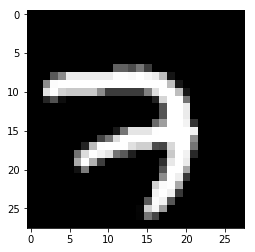

-----------------
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


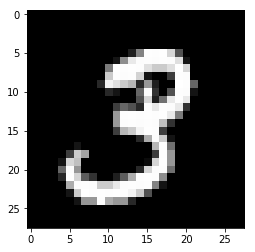

In [6]:
for i in range(2):
    image = data.train.images[i]
    image = np.array(image, dtype='float')
    label = data.train.labels[i]
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    print('-----------------')
    print(label)
    plt.show()

In [7]:
session = tf.InteractiveSession()

In [8]:
def weight_(size):
  initial = tf.truncated_normal(size, stddev=0.1)
  return tf.Variable(initial)

In [9]:
def bias_(size):
  initial = tf.constant(0.1, shape=size)
  return tf.Variable(initial)

In [10]:
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

In [11]:
def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [12]:
Weight_convolution1 = weight_([5, 5, 1, 32])
bias_convolution1 = bias_([32])

In [13]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10])

In [14]:
x_image = tf.reshape(x, [-1, 28, 28, 1])

In [15]:
x_image

<tf.Tensor 'Reshape:0' shape=(?, 28, 28, 1) dtype=float32>

In [16]:
height_conv1 = tf.nn.relu(conv2d(x_image, Weight_convolution1) + bias_convolution1)
height_pool1 = max_pool_2x2(height_conv1)

In [17]:
height_pool1

<tf.Tensor 'MaxPool:0' shape=(?, 14, 14, 32) dtype=float32>

In [18]:
Weight_convolution2 = weight_([5, 5, 32, 64])
bias_convolution2 = bias_([64])

In [19]:
height_conv2 = tf.nn.relu(conv2d(height_pool1, 
                                 Weight_convolution2) + bias_convolution2)
height_pool2 = max_pool_2x2(height_conv2)

In [20]:
Weight_fc1 = weight_([7 * 7 * 64, 1024])
bias_fc1 = bias_([1024])

In [21]:
height_pool2_flat = tf.reshape(height_pool2, [-1, 7*7*64])
height_fc1 = tf.nn.relu(tf.matmul(height_pool2_flat, Weight_fc1) + bias_fc1)

In [22]:
keep_prob = tf.placeholder(tf.float32)
height_fc1_drop = tf.nn.dropout(height_fc1, keep_prob)

In [23]:
Weight_fc2 = weight_([1024, 10])
bias_fc2 = bias_([10])

In [24]:
y_conv = tf.matmul(height_fc1_drop, Weight_fc2) + bias_fc2

In [25]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_conv))
train_step = tf.train.AdamOptimizer(0.0001).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [26]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for i in range(1000):
    batch = data.train.next_batch(50)
    if i % 100 == 0:
      train_accuracy = accuracy.eval(feed_dict={
          x: batch[0], y: batch[1], keep_prob: 1.0})
      print('step %d, training accuracy %g' % (i, train_accuracy))
    train_step.run(feed_dict={x: batch[0], y: batch[1], keep_prob: 0.5})
  print('test accuracy %g' % accuracy.eval(feed_dict={
      x: data.test.images, y: data.test.labels, keep_prob: 1.0}))

step 0, training accuracy 0.1
step 100, training accuracy 0.84
step 200, training accuracy 0.92
step 300, training accuracy 0.96
step 400, training accuracy 0.94
step 500, training accuracy 0.98
step 600, training accuracy 0.92
step 700, training accuracy 0.86
step 800, training accuracy 0.96
step 900, training accuracy 0.92
test accuracy 0.9633
